In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weeklyUnemploymentClaims-allStates-2020.csv")

In [3]:
df.head(30)

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate
0,Alabama,1/4/2020,"4,578",12/28/2019,"18,523","1,923,741",0.96
1,Alabama,1/11/2020,"3,629",1/4/2020,"21,143","1,923,741",1.10
2,Alabama,1/18/2020,"2,483",1/11/2020,"17,402","1,923,741",0.90
3,Alabama,1/25/2020,"2,129",1/18/2020,"18,390","1,923,741",0.96
4,Alabama,2/1/2020,"2,170",1/25/2020,"17,284","1,923,741",0.90
5,Alabama,2/8/2020,"2,176",2/1/2020,"16,745","1,923,741",0.87
6,Alabama,2/15/2020,"1,981",2/8/2020,"16,571","1,923,741",0.86
7,Alabama,2/22/2020,"1,735",2/15/2020,"16,059","1,923,741",0.83
8,Alabama,2/29/2020,"1,575",2/22/2020,"14,721","1,923,741",0.77
9,Alabama,3/7/2020,"1,663",2/29/2020,"13,657","1,923,741",0.71


In [4]:
df['Initial Claims'] = df['Initial Claims'].str.replace(',','')
df['Initial Claims'] = df['Initial Claims'].astype(float)
#df.info()

#df.head()

In [5]:
df_states = df.groupby('State', as_index=False)['Initial Claims'].sum()
df_states.head()

,State,Initial Claims
0,Alabama,472451.0
1,Alaska,90585.0
2,Arizona,557140.0
3,Arkansas,210611.0
4,California,4493014.0


In [6]:
DropStates=["District of Columbia","Puerto Rico","Virgin Islands"]

for i in DropStates:
    df_states.drop(df_states[df_states['State'] == i].index, inplace=True)
    
df_states.sort_values(by=['Initial Claims'],ascending=False,inplace=True)
df_states.shape

(50, 2)

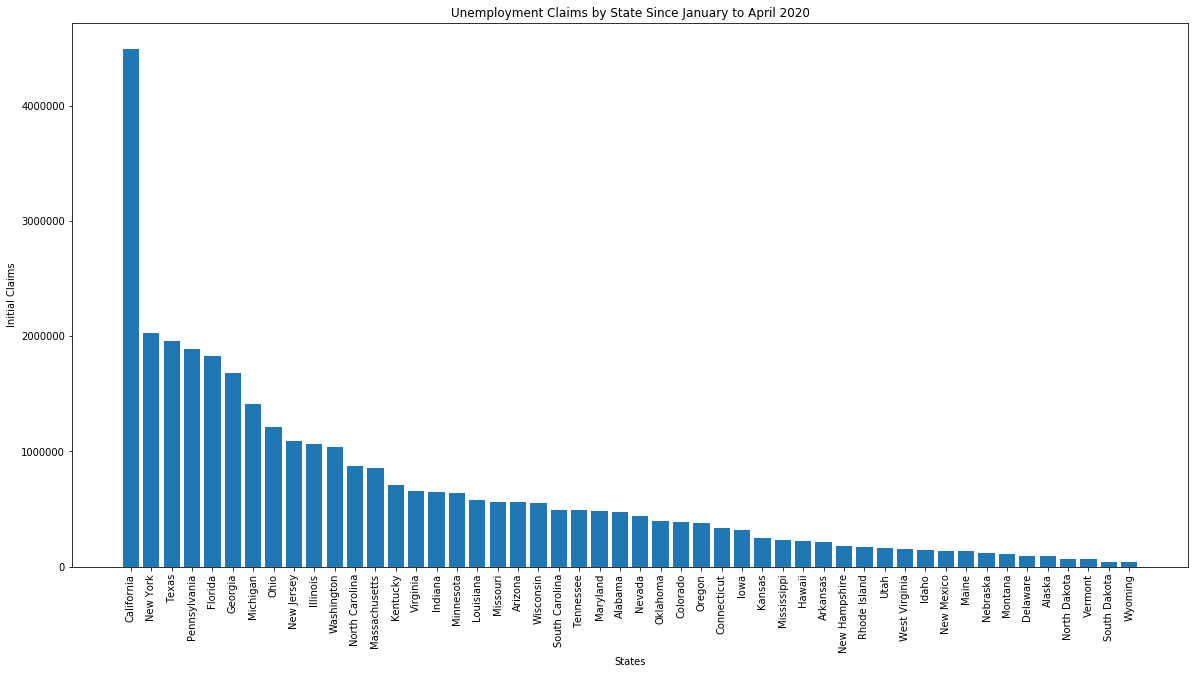

In [7]:
plt.figure(figsize=(20,10))
plt.bar(df_states['State'],df_states['Initial Claims'])
plt.title("Unemployment Claims by State Since January to April 2020")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Initial Claims");

In [8]:
df_states.sort_values(by=['Initial Claims'],ascending=False,inplace=True)
df_states.head(5)

,State,Initial Claims
4,California,4493014.0
32,New York,2026005.0
44,Texas,1958684.0
38,Pennsylvania,1891045.0
9,Florida,1828301.0


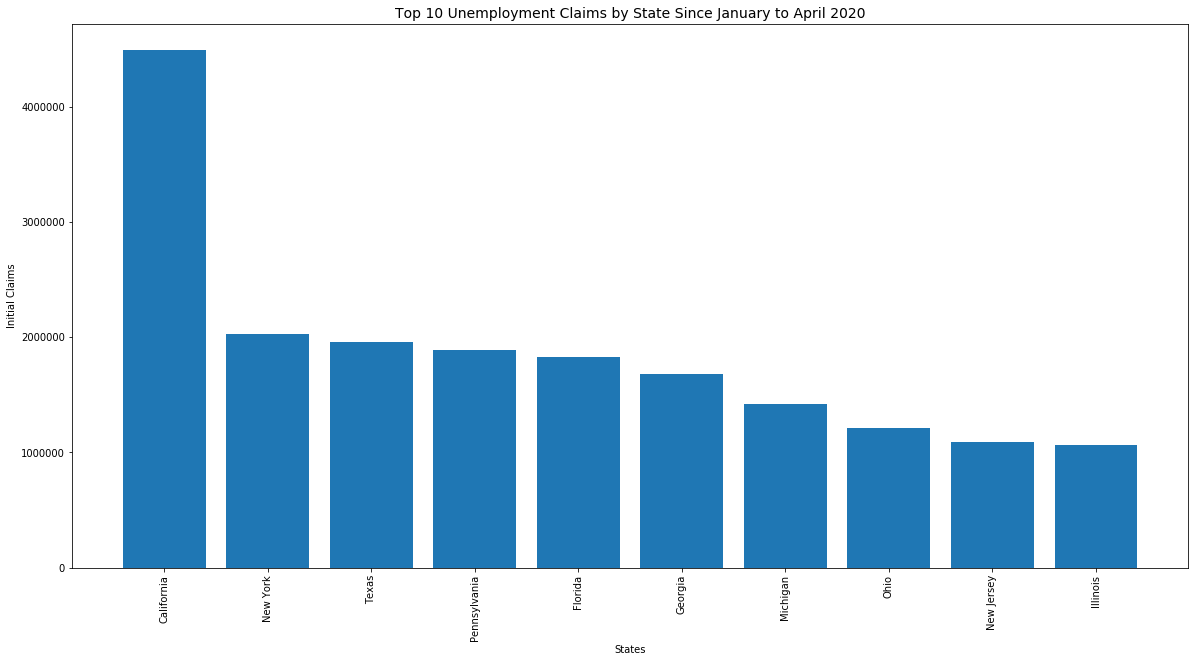

In [9]:
plt.figure(figsize=(20,10))
plt.bar(df_states['State'][0:10],df_states['Initial Claims'][0:10])
plt.title("Top 10 Unemployment Claims by State Since January to April 2020",fontsize=14)
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Initial Claims");

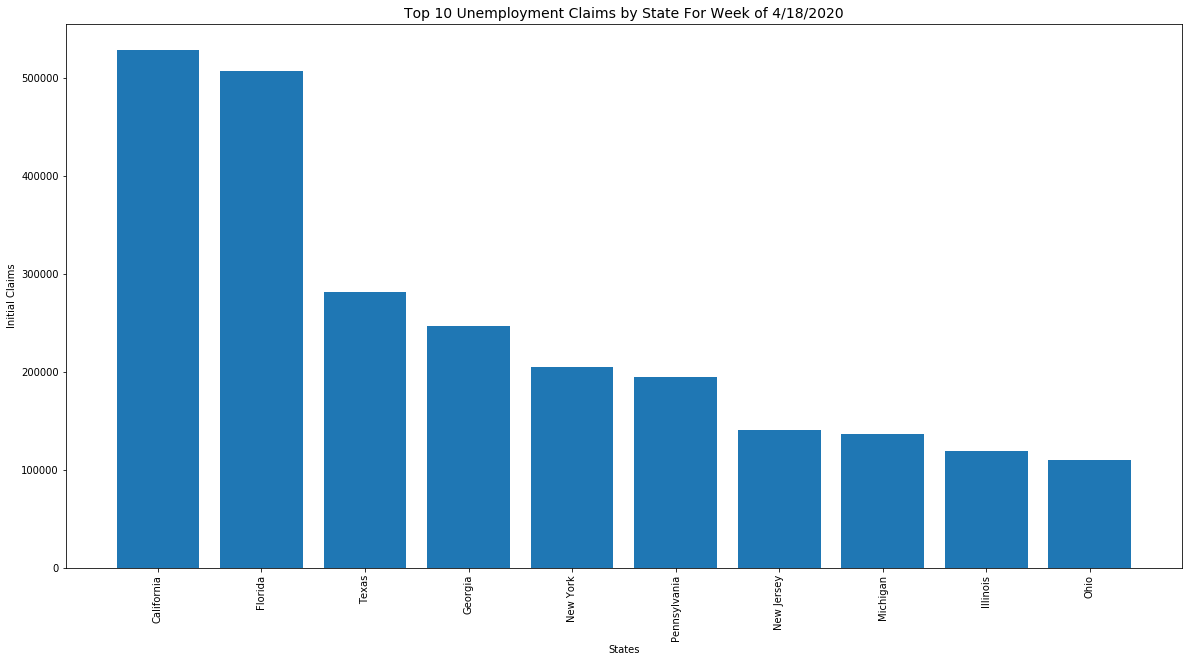

In [10]:
dateClaimsFor="4/18/2020"

df_week = df.drop(df[df['Filed week ended'] != dateClaimsFor].index)
    
df_week.sort_values(by=['Initial Claims'],ascending=False,inplace=True)
plt.figure(figsize=(20,10))
plt.bar(df_week['State'][0:10],df_week['Initial Claims'][0:10])
plt.title("Top 10 Unemployment Claims by State For Week of {}".format(dateClaimsFor),fontsize=14)
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Initial Claims");

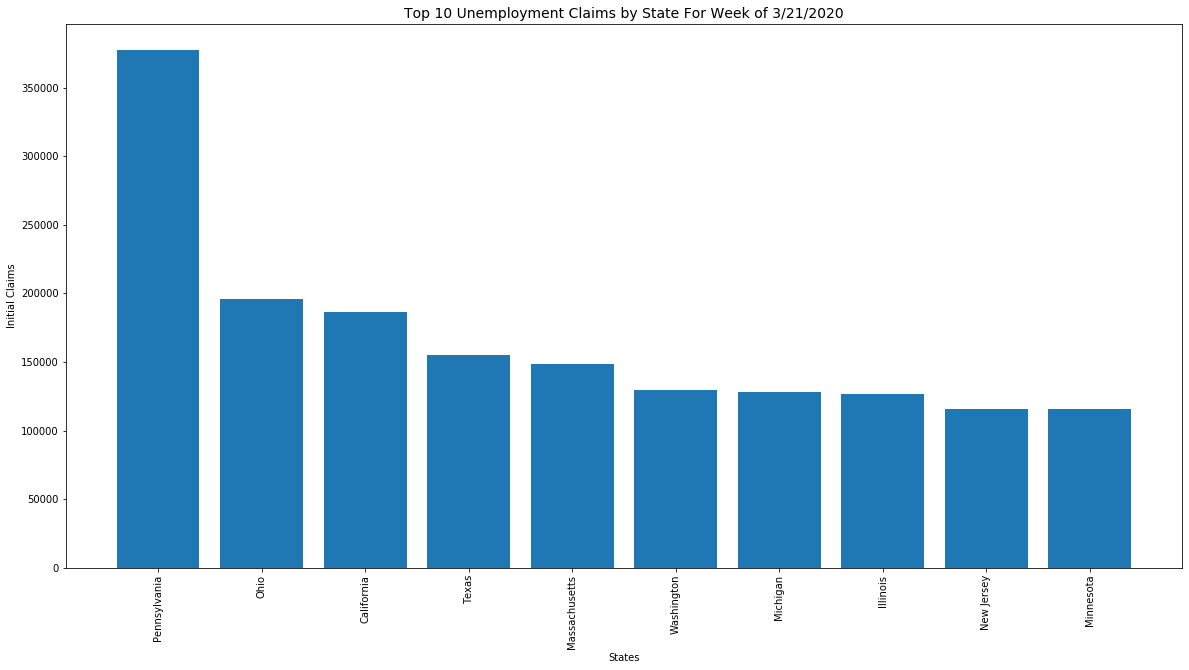

In [11]:
dateClaimsFor="3/21/2020"

df_week = df.drop(df[df['Filed week ended'] != dateClaimsFor].index)
    
df_week.sort_values(by=['Initial Claims'],ascending=False,inplace=True)
plt.figure(figsize=(20,10))
plt.bar(df_week['State'][0:10],df_week['Initial Claims'][0:10])
plt.title("Top 10 Unemployment Claims by State For Week of {}".format(dateClaimsFor),fontsize=14)
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Initial Claims");

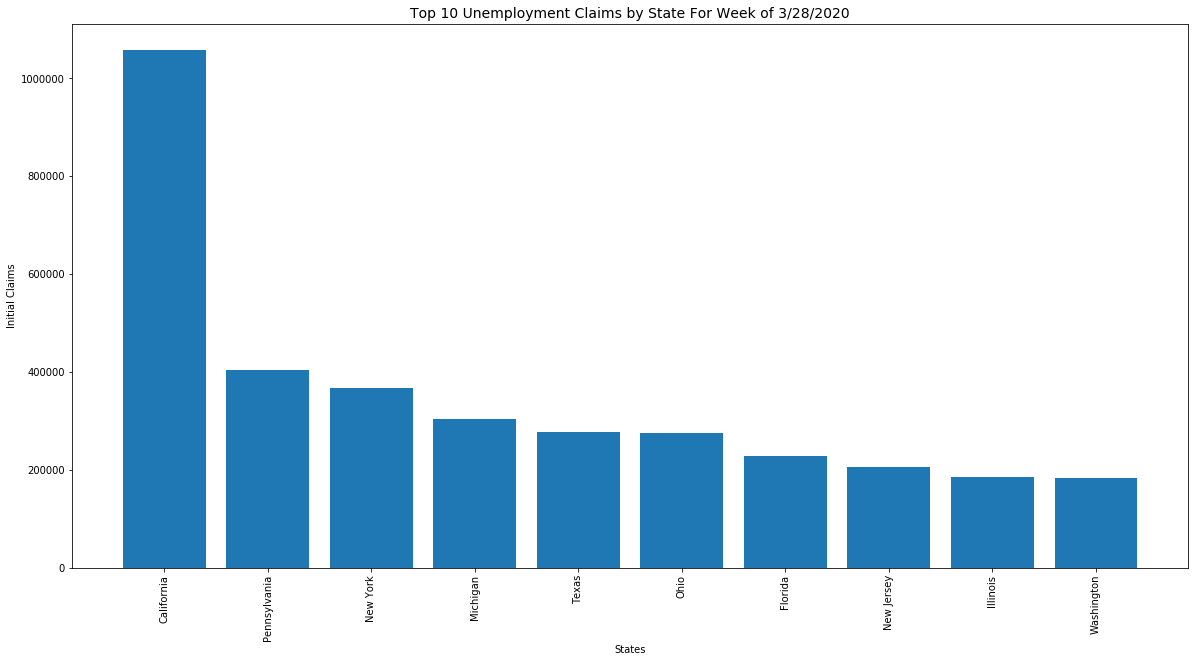

In [12]:
dateClaimsFor="3/28/2020"

df_week = df.drop(df[df['Filed week ended'] != dateClaimsFor].index)
    
df_week.sort_values(by=['Initial Claims'],ascending=False,inplace=True)
plt.figure(figsize=(20,10))
plt.bar(df_week['State'][0:10],df_week['Initial Claims'][0:10])
plt.title("Top 10 Unemployment Claims by State For Week of {}".format(dateClaimsFor),fontsize=14)
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Initial Claims");

In [13]:
dateClaimsFor="4/18/2020"

df_week = df.drop(df[df['Filed week ended'] != dateClaimsFor].index)
    
df_week.sort_values(by=['Initial Claims'],ascending=False,inplace=True)

df_week[['State','Initial Claims']][0:10]

,State,Initial Claims
87,California,528360.0
177,Florida,506670.0
807,Texas,280761.0
195,Georgia,247003.0
627,New York,205184.0
699,Pennsylvania,194594.0
573,New Jersey,140139.0
411,Michigan,136707.0
249,Illinois,118996.0
645,Ohio,109830.0


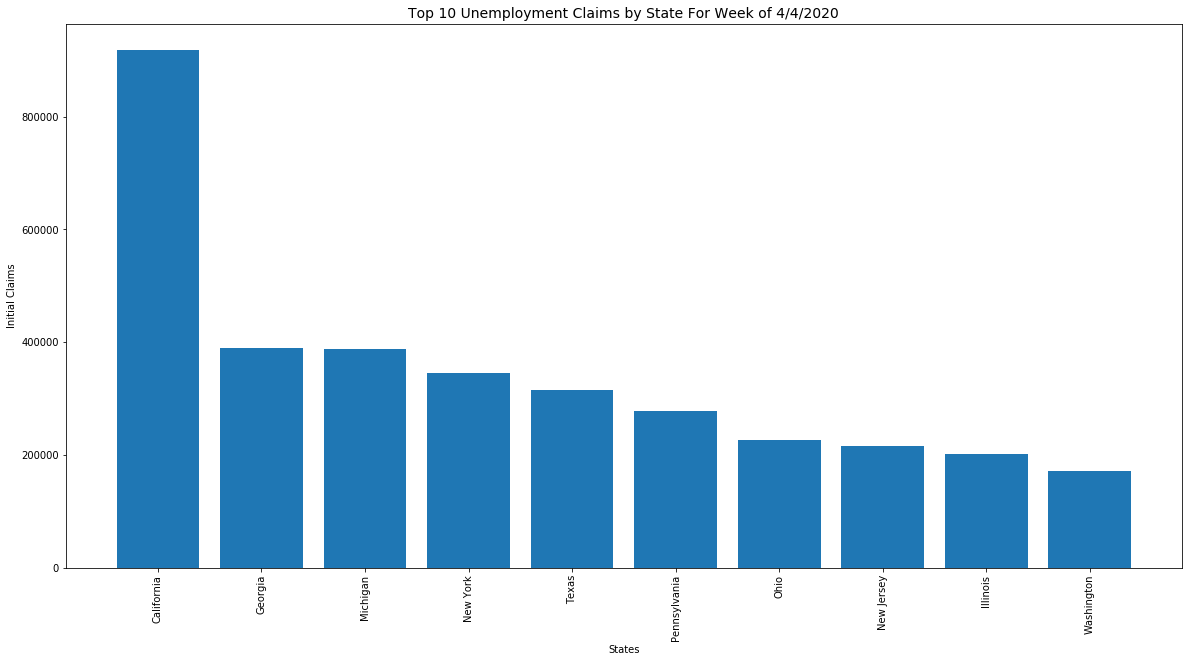

In [14]:
dateClaimsFor="4/4/2020"

df_week = df.drop(df[df['Filed week ended'] != dateClaimsFor].index)
    
df_week.sort_values(by=['Initial Claims'],ascending=False,inplace=True)
plt.figure(figsize=(20,10))
plt.bar(df_week['State'][0:10],df_week['Initial Claims'][0:10])
plt.title("Top 10 Unemployment Claims by State For Week of {}".format(dateClaimsFor),fontsize=14)
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Initial Claims");

In [16]:
import folium

state_geo = "us-states.json"

# Initialize the map:
map = folium.Map(location=[37, -102], zoom_start=5)

# Add the color for the chloropleth:
map.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=df_states,
 columns=['State', 'Initial Claims'],
 key_on='feature.properties.name',
 fill_color='RdPu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Total Unemployment Claims From January to April 18, 2020'
)
folium.LayerControl().add_to(map)
 
map

FileNotFoundError: [Errno 2] No such file or directory: 'us-states.json'

In [ ]:
TopStates = 9

df_TopStates = df_states[0:TopStates]

allOther = df_states['Initial Claims'][TopStates:].sum()

remaining = 50 - TopStates
allOtherName = 'All Other {} States'.format(remaining)
df_temp = [{'State':allOtherName,'Initial Claims':allOther}]

df_TopStates = df_TopStates.append(df_temp,ignore_index=True,sort=False)
df_TopStates
#df_temp

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(df_TopStates['Initial Claims'], labels=df_TopStates['State'], autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()